# Adding 'relu' explicitly so can visualize linear projection relative to threshold

In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import pyret.filtertools as ft
import pyret.visualizations as pyviz
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import minimize
from numpy.linalg import norm
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


# Load models

In [2]:
architecture_filename = 'architecture.json'
naturalscenes_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-10 17.36.07 convnet/')
naturalscenes_weight_filename = 'epoch011_iter04950_weights.h5' # .49 cc on held-out

In [3]:
naturalscenes_architecture_data = open(naturalscenes_data_dir + architecture_filename, 'r')
naturalscenes_architecture_string = naturalscenes_architecture_data.read()
naturalscenes_model = model_from_json(naturalscenes_architecture_string)
naturalscenes_model.load_weights(naturalscenes_data_dir + naturalscenes_weight_filename)

In [4]:
naturalscenes_weights = h5py.File(naturalscenes_data_dir + naturalscenes_weight_filename, 'r')
list(naturalscenes_weights)

[u'layer_0', u'layer_1', u'layer_2', u'layer_3', u'layer_4', u'layer_5']

In [7]:
list(naturalscenes_weights['layer_0'])

[u'param_0', u'param_1']

# Define linear activations of first layer

In [16]:
layer_id = 0
naturalscenes_1st_layer_output = theano.function([naturalscenes_model.layers[0].input], 
                                              naturalscenes_model.layers[layer_id].get_output(train=False))

# Define stimuli

In [9]:
naturalscenes_test = loadexpt(0, 'naturalscene', 'test', 40)
whitenoise_test = loadexpt(0, 'whitenoise', 'test', 40)

Loading testing data... Done.
Loading testing data... Done.


# Get linear activations of first layer

In [17]:
naturalscenes_activations = []

In [18]:
for X, y in datagen(50, *naturalscenes_test):
    naturalscenes_activations.extend(naturalscenes_1st_layer_output(X))

In [41]:
count, bin_edges = np.histogram(naturalscenes_activations, 100, normed=True)

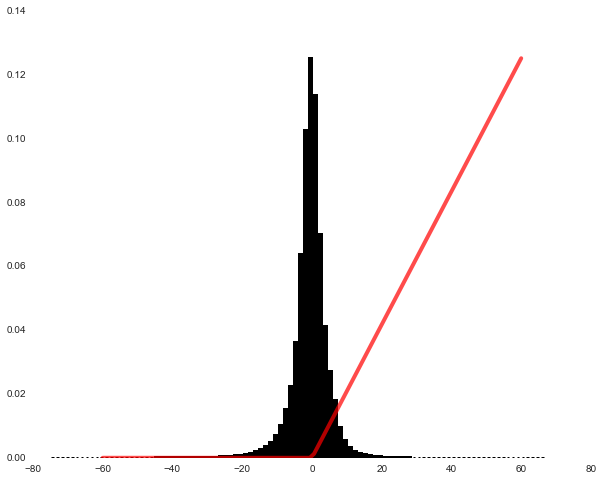

In [52]:
plt.bar(bin_edges[:-1], count, color='k', linewidth=3)
plt.plot(np.linspace(-60, 60, 100), 
         np.where(np.linspace(-60, 60, 100) > 0, np.max(count)*np.linspace(-60, 60, 100)/60., 0), 
         'r', linewidth=4, alpha=0.7)

# Get linear activations of affine units

In [54]:
naturalscenes_architecture_string

'{"layers": [{"b_constraint": null, "name": "Convolution2D", "activity_regularizer": null, "W_constraint": null, "input_shape": [40, 50, 50], "nb_col": 13, "subsample": [1, 1], "init": "normal", "nb_filter": 8, "b_regularizer": null, "W_regularizer": {"l2": 0.01, "name": "WeightRegularizer", "l1": 0.0}, "nb_row": 13, "activation": "linear", "border_mode": "same"}, {"beta": 0.1, "activation": "relu", "name": "Activation", "target": 0}, {"stride": [2, 2], "name": "MaxPooling2D", "ignore_border": true, "pool_size": [2, 2]}, {"name": "Flatten"}, {"b_constraint": null, "name": "Dense", "activity_regularizer": null, "W_constraint": null, "init": "normal", "activation": "relu", "input_dim": null, "b_regularizer": null, "W_regularizer": {"l2": 0.01, "name": "WeightRegularizer", "l1": 0.0}, "output_dim": 16}, {"b_constraint": null, "name": "Dense", "activity_regularizer": null, "W_constraint": null, "init": "normal", "activation": "softplus", "input_dim": null, "b_regularizer": null, "W_regular

In [ ]:
layer_id = 0
naturalscenes_1st_layer_output = theano.function([naturalscenes_model.layers[0].input], 
                                              naturalscenes_model.layers[layer_id].get_output(train=False))